In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, svm, naive_bayes, metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
import nltk
import pickle 
import csv

In [5]:
# read the processed data
dp = pd.read_csv('processed_data_vol2.csv')

# read the processed data
dc = pd.read_csv('class.csv')

In [7]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(dp['text_final'], dc['class'], test_size=0.3)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

#With Tfidf Vectorizer
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(dp['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [8]:
# SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
#To find accuracy
print("SVM Accuracy Score with Tdidf Vectorizer -> ",accuracy_score(predictions_SVM, Test_Y)*100)

# save the trained SVM model to disk
filename = 'finalized_model_SVM.sav'
pickle.dump(SVM, open(filename, 'wb'))

SVM Accuracy Score with Tdidf Vectorizer ->  90.20921364526436


In [9]:
# NAIVE BAYES 

# fits the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

print("Naive Bayes Accuracy Score with Tdidf Vectorizer -> ", accuracy_score(predictions_NB, Test_Y)*100)
filename = 'finalized_model_NB.sav'
pickle.dump(Naive, open(filename, 'wb'))

Naive Bayes Accuracy Score with Tdidf Vectorizer ->  79.88251056374317


In [10]:
#ANN
# Initialize and train the ANN classifier
ANN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=0.0001,
                    solver='adam', verbose=False, tol=0.0001, random_state=42,
                    learning_rate_init=0.001)
ANN.fit(Train_X_Tfidf,Train_Y)

# Predict on testing data
predictions_ANN = ANN.predict(Test_X_Tfidf)

print("ANN Accuracy Score with Tdidf Vectorizer -> ", accuracy_score(predictions_ANN, Test_Y)*100)
filename = 'finalized_model_ANN.sav'
pickle.dump(ANN, open(filename, 'wb'))

C:\Users\ROSALIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


ANN Accuracy Score with Tdidf Vectorizer ->  82.66515510666804


In [11]:
#Random forest

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Train_X_Tfidf,Train_Y)

# Predict on testing data
predictions_RF = rf.predict(Test_X_Tfidf)


print("Random Forest Accuracy Score with Tdidf Vectorizer -> ", accuracy_score(predictions_RF, Test_Y)*100)
filename = 'finalized_model_RF.sav'
pickle.dump(rf, open(filename, 'wb'))

Random Forest Accuracy Score with Tdidf Vectorizer ->  89.62176646398021


In [12]:
# plot confusion matrix
def generate_conf_matrixes(model, predictions, analyzer, vectorizer):
    mat = confusion_matrix(predictions, Test_Y)
    axis_labels=['Hateful', 'Not Hateful']
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=axis_labels, yticklabels=axis_labels)
    plt.title(f"{model} with {vectorizer} ({analyzer} based)")
    plt.xlabel('Predicted Categories')
    plt.ylabel('True Categories')
    plt.show() 

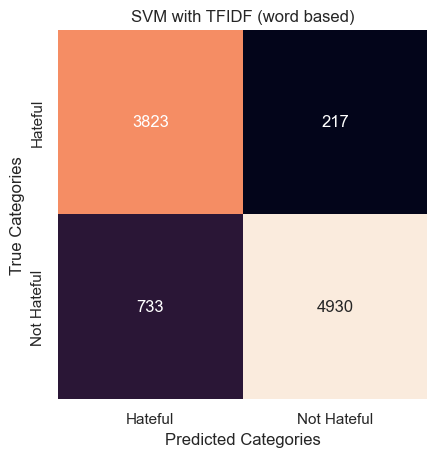

In [13]:
# SVM
generate_conf_matrixes("SVM", predictions_SVM, "word", "TFIDF")

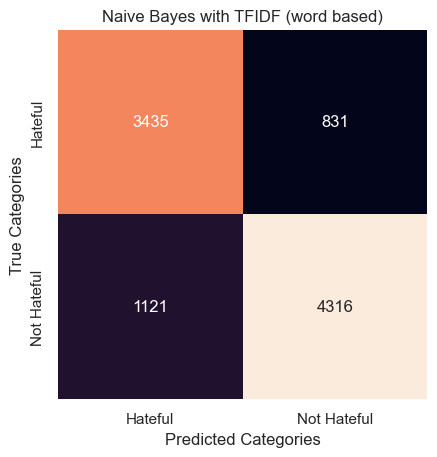

In [14]:
# Naive Bayes
generate_conf_matrixes("Naive Bayes", predictions_NB, "word", "TFIDF")

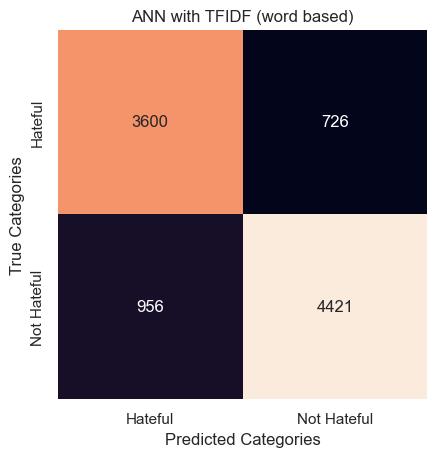

In [15]:
# ANN
generate_conf_matrixes("ANN", predictions_ANN, "word", "TFIDF")

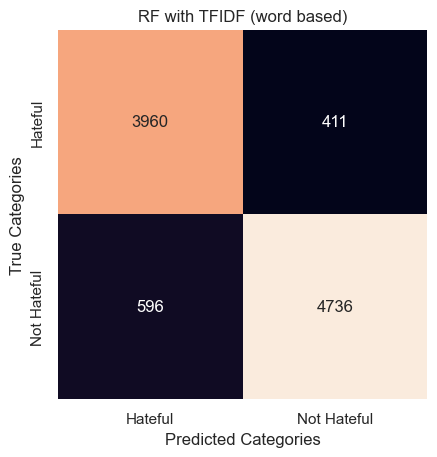

In [16]:
# RF
generate_conf_matrixes("RF", predictions_RF, "word", "TFIDF")